## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Let's import the libraries.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Let's import the data.
url = "https://raw.githubusercontent.com/wanermelon/EDA-on-Suicide-Rates/main/master.csv"
Suicide_rate = pd.read_csv(url)
Suicide_rate.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Clean data
Suicide_rate = Suicide_rate.rename(columns={' gdp_for_year ($) ': 'gdp_for_year'})
Suicide_rate = Suicide_rate.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita'})
Suicide_rate = Suicide_rate.drop(["country-year", "HDI for year","gdp_for_year"], axis=1)
Suicide_rate = Suicide_rate.drop_duplicates(keep='first')
Suicide_rate.dropna()
Suicide_rate = Suicide_rate.rename(columns={'suicides/100k pop': 'Suicide_per_Hundred_K_Pop'})
Suicide_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    27820 non-null  object 
 1   year                       27820 non-null  int64  
 2   sex                        27820 non-null  object 
 3   age                        27820 non-null  object 
 4   suicides_no                27820 non-null  int64  
 5   population                 27820 non-null  int64  
 6   Suicide_per_Hundred_K_Pop  27820 non-null  float64
 7   gdp_per_capita             27820 non-null  int64  
 8   generation                 27820 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.1+ MB


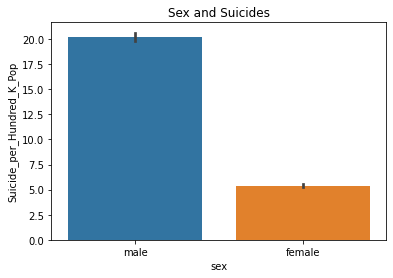

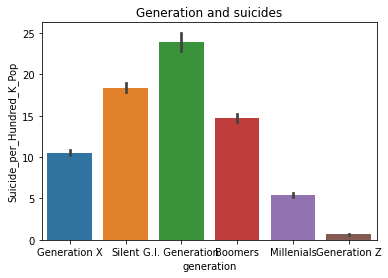

In [4]:
# Exploring and testing libraries imported.
plt.figure(1)
sn.barplot(x=Suicide_rate.sex, y=Suicide_rate.Suicide_per_Hundred_K_Pop)
plt.title("Sex and Suicides")
plt.figure(2)
sn.barplot(x=Suicide_rate.generation, y=Suicide_rate.Suicide_per_Hundred_K_Pop) 
plt.title("Generation and suicides")
plt.show()

In [5]:
# Let's split the data into training and testing.
# After exploring the data, I'm more interested in the connection between Suicide rates and GPD.
# Therefore, I chose Suicide_per_Hundred_K_Pop as X and gdp_per_capita as y.
# I also made the categorical variables in the dataset dummy variable.
df2 = pd.get_dummies(Suicide_rate, columns=['sex','generation'])

X=df2.iloc[:,-9]
print(X)

0         796
1         796
2         796
3         796
4         796
         ... 
27815    2309
27816    2309
27817    2309
27818    2309
27819    2309
Name: gdp_per_capita, Length: 27820, dtype: int64


In [6]:
y=df2.iloc[:,5]
print(y)

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: Suicide_per_Hundred_K_Pop, Length: 27820, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18639,) (9181,) (18639,) (9181,)


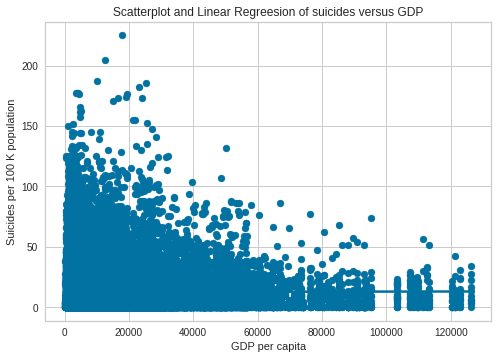

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
x = Suicide_rate['gdp_per_capita']
X = x[:, np.newaxis]
y = Suicide_rate['Suicide_per_Hundred_K_Pop']
model.fit(X, y)

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.title("Scatterplot and Linear Regreesion of suicides versus GDP")
plt.xlabel("GDP per capita")
plt.ylabel("Suicides per 100 K population")
plt.show()

x = Suicide_rate['gdp_per_capita'].values
X = x.reshape(-1, 1)
y = Suicide_rate['Suicide_per_Hundred_K_Pop']


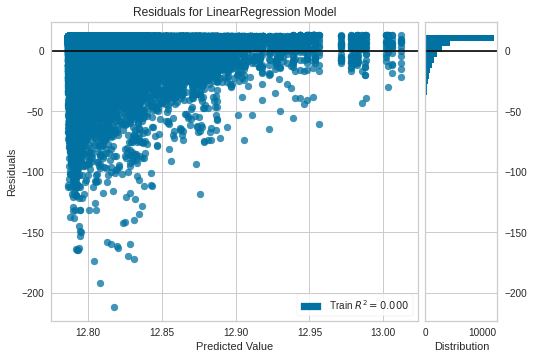

In [9]:
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.poof()

In [10]:
# partition data into train and test splits
from sklearn.linear_model import LinearRegression

y = Suicide_rate['Suicide_per_Hundred_K_Pop']
X = Suicide_rate.loc[:, ['gdp_per_capita']]

print(y.shape)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)


(27820,)
(27820, 1)
(19474,)
(19474, 1)
(8346,)
(8346, 1)


-3.519681825547849e-05

In [60]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


alpha_user = 0.03427385
lasso_model = Lasso(alpha=alpha_user,normalize=True)
ridge_mode = Ridge(alpha= alpha_user, normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print(lasso_coef)

[0.]


In [48]:
#How do we choose the right alpha?
#This is where the validation dataset comes in!
alpha_space = np.logspace(-4, 0, 50)
print(alpha_space)
model_scores = []

lasso_model = Lasso(normalize=True) #same for Ridge
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    from sklearn.model_selection import cross_val_score
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(np.max(model_scores))
print(alpha_space[best_alpha_index])

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]
-0.0006605749993643828
0.0009540954763499944


In [11]:
contingencyTable = pd.crosstab(Suicide_rate['Suicide_per_Hundred_K_Pop'], Suicide_rate['gdp_per_capita'])
print(contingencyTable)

gdp_per_capita             251     291     313     ...  121315  122729  126352
Suicide_per_Hundred_K_Pop                          ...                        
0.00                            4       0       0  ...       4       2       1
0.02                            0       0       0  ...       0       0       0
0.03                            0       0       0  ...       0       0       0
0.04                            0       0       0  ...       0       0       0
0.05                            0       0       0  ...       0       0       0
...                           ...     ...     ...  ...     ...     ...     ...
182.32                          0       0       0  ...       0       0       0
185.37                          0       0       0  ...       0       0       0
187.06                          0       0       0  ...       0       0       0
204.92                          0       0       0  ...       0       0       0
224.97                          0       0       0  .

In [12]:
# sum of rows and columns of contingency table
print(contingencyTable.sum(axis=1))
print(contingencyTable.sum(axis=0))

# contingency table as percentages of gender total
print(contingencyTable.astype('float').div(contingencyTable.sum(axis=1), axis=0))

Suicide_per_Hundred_K_Pop
0.00      4281
0.02         5
0.03         8
0.04        14
0.05        10
          ... 
182.32       1
185.37       1
187.06       1
204.92       1
224.97       1
Length: 5298, dtype: int64
gdp_per_capita
251       12
291       12
313       12
345       12
357       12
          ..
113120    12
120423    12
121315    12
122729    12
126352    12
Length: 2233, dtype: int64
gdp_per_capita               251     291     ...    122729    126352
Suicide_per_Hundred_K_Pop                    ...                    
0.00                       0.000934     0.0  ...  0.000467  0.000234
0.02                       0.000000     0.0  ...  0.000000  0.000000
0.03                       0.000000     0.0  ...  0.000000  0.000000
0.04                       0.000000     0.0  ...  0.000000  0.000000
0.05                       0.000000     0.0  ...  0.000000  0.000000
...                             ...     ...  ...       ...       ...
182.32                     0.000000     0.0  

In [13]:
print(sum(y==0)/y.shape[0])

0.153882099209202


In [14]:
print(X.head())
print(y.head())

   gdp_per_capita
0             796
1             796
2             796
3             796
4             796
0    6.71
1    5.19
2    4.83
3    4.59
4    3.28
Name: Suicide_per_Hundred_K_Pop, dtype: float64


In [24]:
from sklearn import preprocessing
from sklearn import utils

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
y_train = y_train.astype('int')


continuous
multiclass


In [29]:
logReg = LogisticRegression()

# fit the model with data
logReg.fit(X_train, y_train)

# make predictions
y_pred = logReg.predict(X_test)

# evaluate the performance
y_test = y_test.astype('int')
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

[[2182    0    0 ...    0    0    0]
 [ 534    0    0 ...    0    0    0]
 [ 407    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
Accuracy: 0.26144260723699975


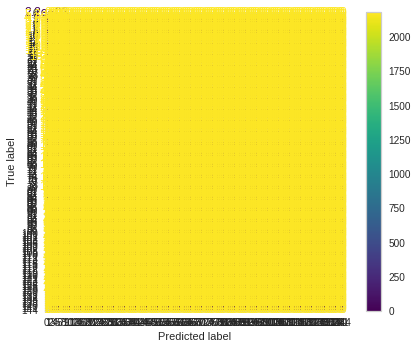

In [32]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test,y_test)


metrics.plot_confusion_matrix(logReg, X_test, y_test)

In [33]:
# Print precision, recall, F-beta score and support
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      1.00      0.41      2182
           1       0.00      0.00      0.00       534
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       364
           4       0.00      0.00      0.00       377
           5       0.00      0.00      0.00       324
           6       0.00      0.00      0.00       286
           7       0.00      0.00      0.00       274
           8       0.00      0.00      0.00       248
           9       0.00      0.00      0.00       229
          10       0.00      0.00      0.00       178
          11       0.00      0.00      0.00       158
          12       0.00      0.00      0.00       171
          13       0.00      0.00      0.00       173
          14       0.00      0.00      0.00       151
          15       0.00      0.00      0.00       129
          16       0.00      0.00      0.00       115
          17       0.00    

In [38]:
from sklearn import linear_model
# L1 regulation
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
reg.coef_

array([2.77080609e-06])

In [40]:
reg.intercept_

12.342393690186412

In [61]:
# L2 regulation
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
reg.coef_

array([2.77108682e-06])

In [63]:
reg.intercept_

12.34238900139089